In [1]:
# Let's use MAF to pull up the observations from a single point in the sky

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import healpy as hp
import rubin_sim.maf as maf
import rubin_sim.utils as utils


In [3]:
from rubin_sim.data import get_baseline

baseline_file = get_baseline()

run_name = os.path.split(baseline_file)[-1].replace('.db', '')
print(run_name)

baseline_v2.1_10yrs


In [4]:
# Specify ra / dec of the point we want to work with on the sky - in degrees. 
# (these can be lists, if you want to work on multiple, limited points on the sky)
test_ra = 0.0
test_dec = -20.0
test_slicer = maf.UserPointsSlicer(test_ra, test_dec)


In [5]:
cols = ['observationStartMJD', 'fieldRA', 'fieldDec', 'rotTelPos',
        'fivesigmadepth', 'rotSkyPos', 'filter', 'night', 'note']
metric = maf.PassMetric(cols=cols)


In [6]:
sql=''
bundle = maf.MetricBundle(metric, test_slicer, sql, run_name=run_name)


In [7]:
g = maf.MetricBundleGroup({'test_metric': bundle}, baseline_file,
                          out_dir='test', results_db=None)
# And calculate the metric
g.run_all()

In [8]:
bundle.metric_values[0][0:2]

rec.array([(358.93416218, 24.35333976, -64.14716119, 'g', 1869, 48.20257096, 62087.15764973, -21.44760538, 'blob, ug, b'),
           (358.93416218, 23.73716066, -64.14716119, 'u', 1869, 50.138314  , 62087.13343296, -21.44760538, 'blob, ug, a')],
          dtype=[('fieldRA', '<f8'), ('fiveSigmaDepth', '<f8'), ('rotSkyPos', '<f8'), ('filter', 'O'), ('night', '<i8'), ('rotTelPos', '<f8'), ('observationStartMJD', '<f8'), ('fieldDec', '<f8'), ('note', 'O')])

Text(0, 0.5, '5$\\sigma$ depth (mags)')

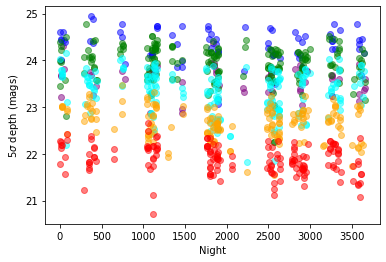

In [9]:
# filter to color dict
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
           'i': 'cyan', 'z': 'orange', 'y': 'red'}

mv = bundle.metric_values[0]

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
for fn in f2c:
    in_filt = np.where(mv['filter'] == fn)[0]
    ax1.plot(mv['night'][in_filt],
             mv['fiveSigmaDepth'][in_filt], 'o',
             color=f2c[fn], label=fn, alpha=0.5)
ax1.set_xlabel('Night')
ax1.set_ylabel(r'5$\sigma$ depth (mags)')

    
